In [2]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier

## Importamos el dataset

In [3]:
df=pd.read_csv('/Users/ismaelgarciainigo/Desktop/mortgage.csv')

In [4]:
print(df.shape)

(622489, 23)


## Visualización del dataframe

In [4]:
df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


## Previsualizacón EDA

In [5]:
def eda(df): 
    eda = {}
    eda['null_sum'] = df.isnull().sum()
    eda['null_pct'] = df.isnull().mean()
    eda['dtypes'] = df.dtypes
    eda['count'] = df.count()
    eda['mean'] = df.mean()
    eda['median'] = df.median()
    eda['min'] = df.min()
    eda['max'] = df.max()
    
    return pd.DataFrame(eda)


In [6]:
eda(df)

,null_sum,null_pct,dtypes,count,mean,median,min,max
id,0,0.000000,int64,622489,25147.492561,24881.000000,1.000000,5.000000e+04
time,0,0.000000,int64,622489,35.800806,34.000000,1.000000,6.000000e+01
orig_time,0,0.000000,int64,622489,20.570057,22.000000,-40.000000,6.000000e+01
first_time,0,0.000000,int64,622489,24.607362,25.000000,1.000000,6.000000e+01
mat_time,0,0.000000,int64,622489,137.206527,142.000000,18.000000,2.290000e+02
balance_time,0,0.000000,float64,622489,245964.902324,180618.290000,0.000000,8.701859e+06
LTV_time,270,0.000434,float64,622219,83.078239,82.253269,0.000000,8.035135e+02
interest_rate_time,0,0.000000,float64,622489,6.702451,6.625000,0.000000,3.750000e+01
hpi_time,0,0.000000,float64,622489,184.102450,180.520000,107.830000,2.262900e+02
gdp_time,0,0.000000,float64,622489,1.381032,1.850689,-4.146711,5.132464e+00


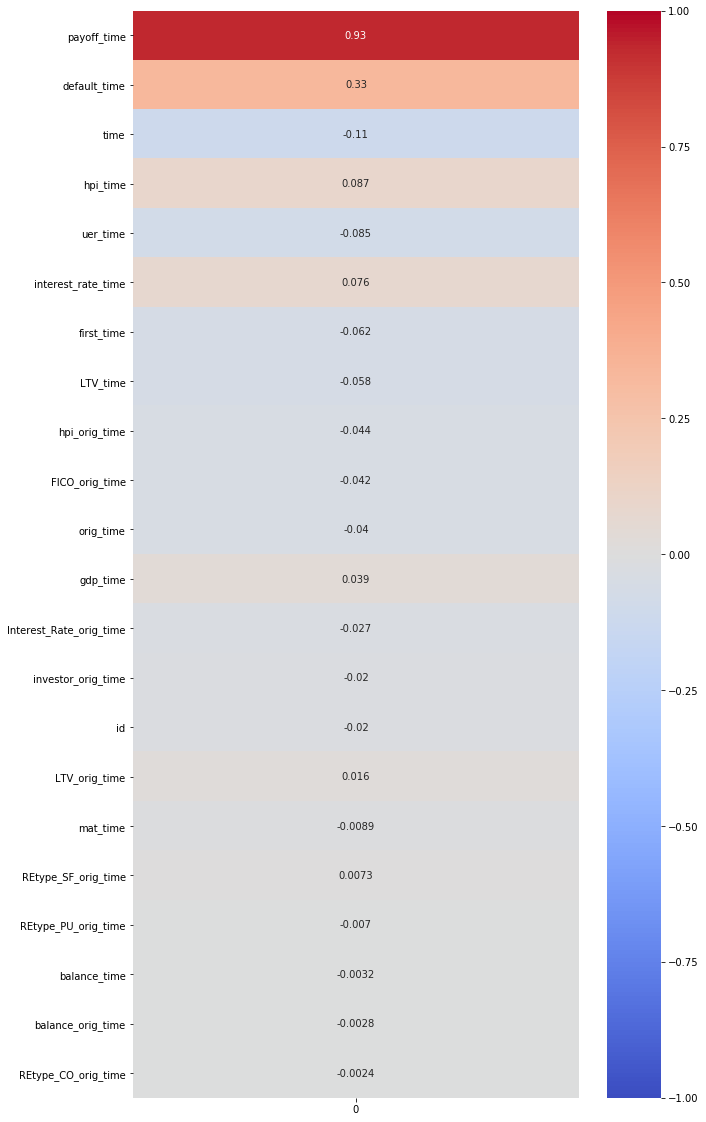

In [7]:
correlations = df.corrwith(df['status_time']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax)
plt.show()

## Visualización de los datos

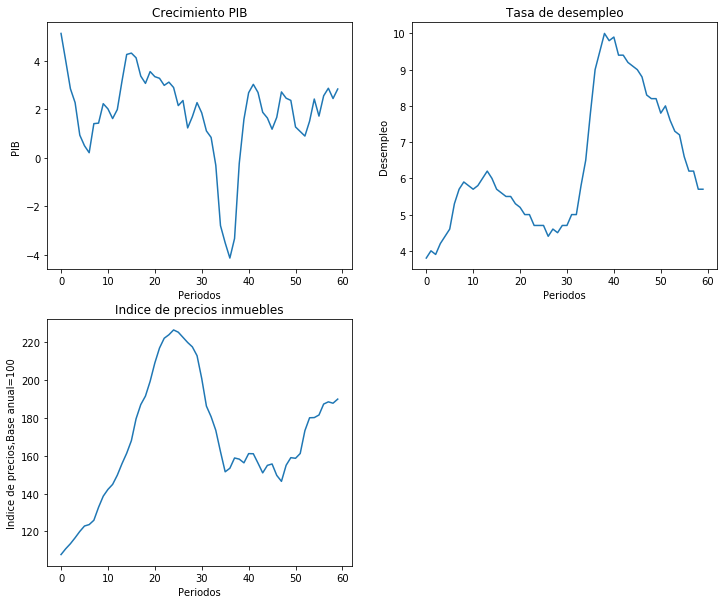

In [8]:
lista_gdp=[]
lista_desempleo=[]
lista_indice_precios=[]

for i in df.time.sort_values().unique():
    lista_gdp.append(df[df['time']==i]['gdp_time'].unique())
    lista_desempleo.append(df[df['time']==i]['uer_time'].unique())
    lista_indice_precios.append(df[df['time']==i]['hpi_time'].unique())
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(lista_gdp)
plt.xlabel('Periodos')  
plt.ylabel('PIB')  
plt.title('Crecimiento PIB') 
plt.subplot(2,2,2)
plt.plot(lista_desempleo)
plt.xlabel('Periodos')  
plt.ylabel('Desempleo')  
plt.title('Tasa de desempleo') 
plt.subplot(2,2,3)
plt.plot(lista_indice_precios)
plt.xlabel('Periodos')  
plt.ylabel('Indice de precios,Base anual=100')  
plt.title('Indice de precios inmuebles')  
plt.show()

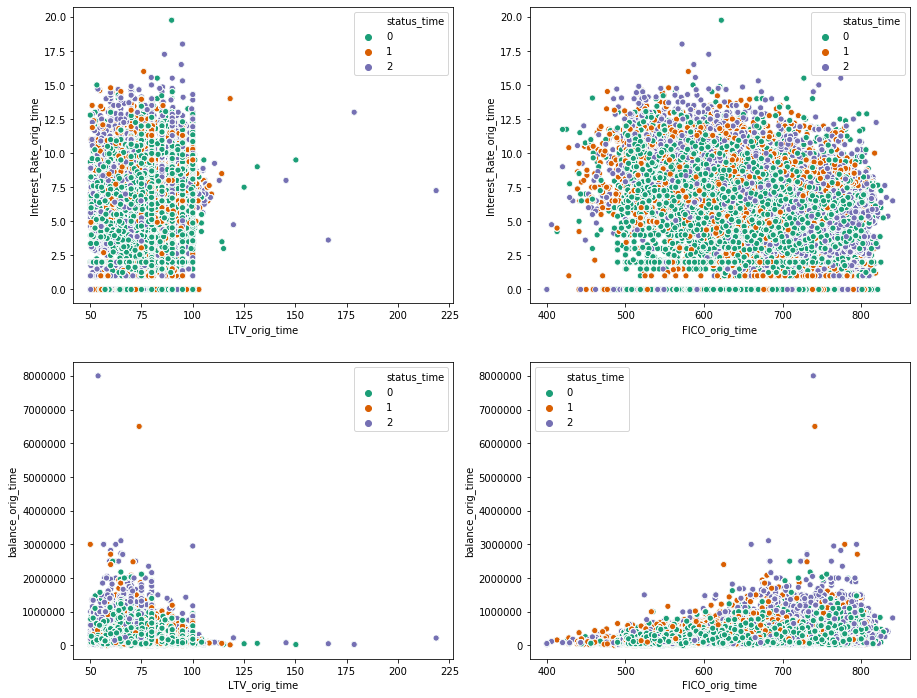

In [9]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.scatterplot(df.LTV_orig_time,df.Interest_Rate_orig_time,hue=df.status_time,palette='Dark2')
plt.subplot(2,2,2)
sns.scatterplot(df.FICO_orig_time,df.Interest_Rate_orig_time,hue=df.status_time,palette='Dark2')
plt.subplot(2,2,3)
sns.scatterplot(df.LTV_orig_time,df.balance_orig_time,hue=df.status_time,palette='Dark2')
plt.subplot(2,2,4)
sns.scatterplot(df.FICO_orig_time,df.balance_orig_time,hue=df.status_time,palette='Dark2')
plt.show()

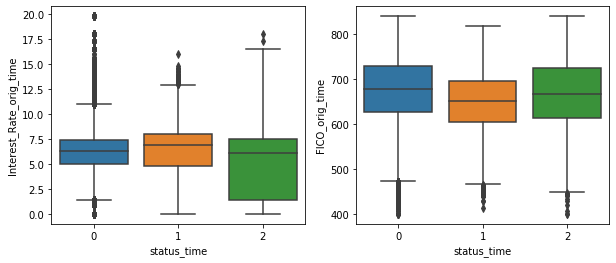

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df.status_time,df.Interest_Rate_orig_time)
plt.subplot(1,2,2)
sns.boxplot(df.status_time,df.FICO_orig_time)
plt.show()

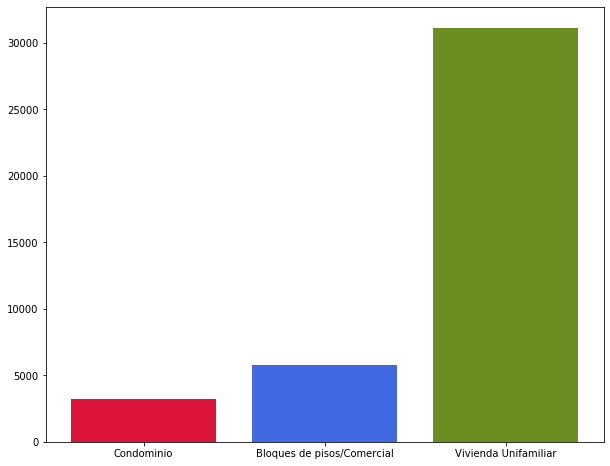

In [11]:
lista_condo=[]
lista_bloques=[]
lista_unifam=[]
for i in df.id.unique():
    lista_condo.append(df[df['id']==i].iloc[0,11])
    lista_bloques.append(df[df['id']==i].iloc[0,12])
    lista_unifam.append(df[df['id']==i].iloc[0,13])

valores=[sum(lista_condo),sum(lista_bloques),sum(lista_unifam)]
etiquetas=['Condominio','Bloques de pisos/Comercial','Vivienda Unifamiliar']
plt.figure(figsize=(10,8))
plt.bar(etiquetas,valores, color=['crimson','royalblue','olivedrab'])
plt.show()



## Redimiensionado del dataframe

In [12]:
lista_index=[]
lista_index_bien=[]
for i in df.id.unique():
    lista_index.append(df[df['id']==i].iloc[-1:,:].index)
for j in range(50000):
    lista_index_bien.append(lista_index[j][0])
        
len(lista_index_bien)


50000

In [13]:
df_model=df.loc[lista_index_bien]
df_model

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
23,1,48,-7,25,113,29087.21,26.658065,9.200,146.45,2.715903,...,1,0,45000.0,715,69.4,9.200,87.03,1,0,1
25,2,26,18,25,138,105654.77,65.469851,7.680,225.10,2.151365,...,1,0,107200.0,558,80.0,7.680,186.91,0,1,2
30,3,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,...,1,0,48600.0,680,83.6,8.750,89.58,0,1,2
65,4,60,-2,25,119,52686.35,34.898842,10.500,189.82,2.836358,...,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
68,5,27,18,25,138,52100.71,66.346343,9.155,222.39,2.361722,...,1,0,52800.0,527,80.0,9.155,186.91,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622452,49996,60,17,52,138,62630.97,51.916531,3.250,189.82,2.836358,...,0,1,82000.0,688,71.9,1.625,179.45,0,0,0
622461,49997,60,17,52,137,347558.19,74.355912,2.750,189.82,2.836358,...,0,0,331417.0,692,75.0,1.250,179.45,0,0,0
622470,49998,60,17,52,137,143676.16,71.896413,3.000,189.82,2.836358,...,0,0,166250.0,750,88.0,2.250,179.45,0,0,0
622479,49999,60,17,52,177,259349.31,42.640152,2.745,189.82,2.836358,...,0,0,345000.0,779,60.0,1.750,179.45,0,0,0


## EDA

In [14]:
eda(df_model)

,null_sum,null_pct,dtypes,count,mean,median,min,max
id,0,0.00000,int64,50000,25000.500000,25000.500000,1.000000,5.000000e+04
time,0,0.00000,int64,50000,36.170740,32.000000,1.000000,6.000000e+01
orig_time,0,0.00000,int64,50000,20.388240,22.000000,-40.000000,6.000000e+01
first_time,0,0.00000,int64,50000,24.696100,25.000000,1.000000,6.000000e+01
mat_time,0,0.00000,int64,50000,137.923620,141.000000,18.000000,2.290000e+02
balance_time,0,0.00000,float64,50000,238972.292454,183579.535000,0.000000,8.688101e+06
LTV_time,18,0.00036,float64,49982,79.312091,78.718905,0.000000,6.169851e+02
interest_rate_time,0,0.00000,float64,50000,7.014623,7.000000,0.000000,3.750000e+01
hpi_time,0,0.00000,float64,50000,190.291879,189.820000,107.830000,2.262900e+02
gdp_time,0,0.00000,float64,50000,1.690324,2.274218,-4.146711,5.132464e+00


## Visualización de los datos

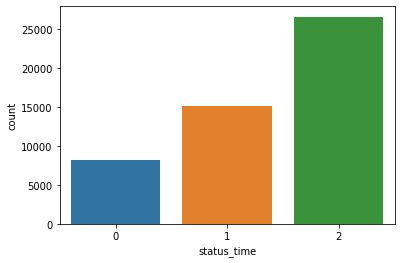

In [15]:
sns.countplot(df_model.status_time)
plt.show()

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_model['LTV_time'] = imputer.fit_transform(df_model[['LTV_time']])

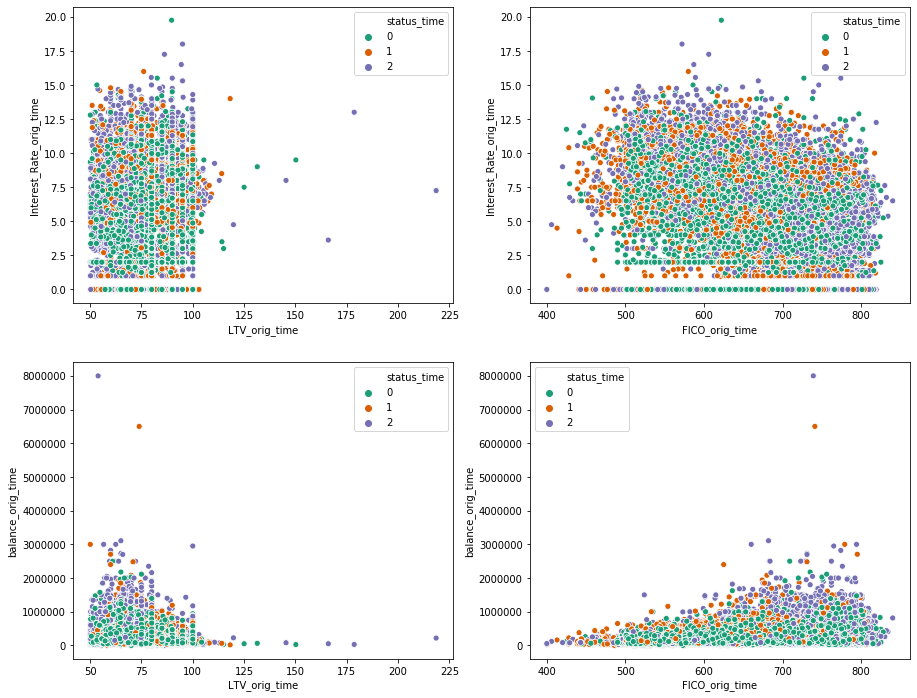

In [17]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.scatterplot(df_model.LTV_orig_time,df_model.Interest_Rate_orig_time,hue=df_model.status_time,palette='Dark2')
plt.subplot(2,2,2)
sns.scatterplot(df_model.FICO_orig_time,df_model.Interest_Rate_orig_time,hue=df_model.status_time,palette='Dark2')
plt.subplot(2,2,3)
sns.scatterplot(df_model.LTV_orig_time,df_model.balance_orig_time,hue=df_model.status_time,palette='Dark2')
plt.subplot(2,2,4)
sns.scatterplot(df_model.FICO_orig_time,df_model.balance_orig_time,hue=df_model.status_time,palette='Dark2')
plt.show()

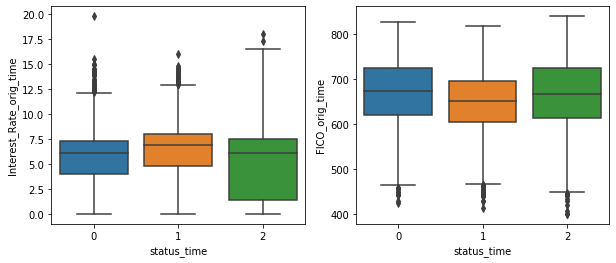

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df_model.status_time,df_model.Interest_Rate_orig_time)
plt.subplot(1,2,2)
sns.boxplot(df_model.status_time,df_model.FICO_orig_time)
plt.show()

In [19]:
df_model.status_time=df_model.status_time.replace({2:0})

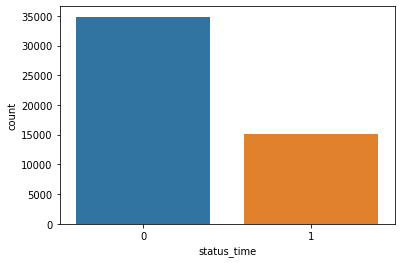

In [20]:
sns.countplot(df_model.status_time)
plt.show()

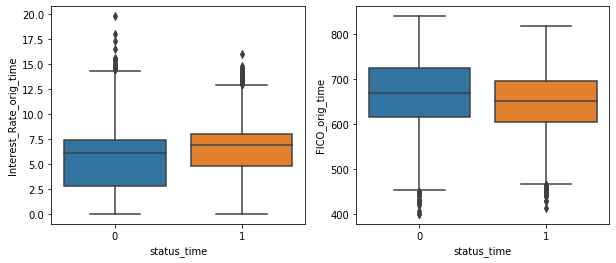

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df_model.status_time,df_model.Interest_Rate_orig_time)
plt.subplot(1,2,2)
sns.boxplot(df_model.status_time,df_model.FICO_orig_time)
plt.show()

## Modelización

In [22]:
lista_norm=['time','orig_time','first_time','mat_time','balance_time','LTV_time','interest_rate_time','hpi_time','gdp_time','uer_time','balance_orig_time','FICO_orig_time','LTV_orig_time','Interest_Rate_orig_time','hpi_orig_time']

In [23]:
from sklearn.preprocessing import MinMaxScaler
df_model[lista_norm]= MinMaxScaler().fit_transform(df_model[lista_norm])
df_model.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
23,1,0.796610,0.33,0.40678,0.450237,0.003348,0.043207,0.245333,0.326017,0.739572,...,1,0,0.005625,0.715909,0.114608,0.465823,0.075176,1,0,1
25,2,0.423729,0.58,0.40678,0.568720,0.012161,0.106113,0.204800,0.989954,0.678732,...,1,0,0.013400,0.359091,0.177553,0.388861,0.738478,0,1,0
30,3,0.474576,0.34,0.40678,0.454976,0.005108,0.050989,0.303333,0.924700,0.629332,...,1,0,0.006075,0.636364,0.198931,0.443038,0.092111,0,1,0
65,4,1.000000,0.38,0.40678,0.478673,0.006064,0.056564,0.280000,0.692132,0.752553,...,1,0,0.007969,0.425000,0.188242,0.531646,0.147961,0,0,0
68,5,0.440678,0.58,0.40678,0.568720,0.005997,0.107533,0.244133,0.967077,0.701402,...,1,0,0.006600,0.288636,0.177553,0.463544,0.738478,0,1,0


### Variables del modelo

In [24]:
X=df_model.iloc[:,:-3].values
y=df_model.status_time.values

## Feature Importances

Feature ranking:
1. feature 6 (0.093697)
2. feature 8 (0.076257)
3. feature 10 (0.073990)
4. feature 9 (0.073401)
5. feature 1 (0.072300)
6. feature 16 (0.067654)
7. feature 7 (0.057852)
8. feature 19 (0.054518)
9. feature 3 (0.053032)
10. feature 5 (0.051964)
11. feature 15 (0.051545)
12. feature 0 (0.051034)
13. feature 18 (0.048473)
14. feature 2 (0.044241)
15. feature 4 (0.044129)
16. feature 17 (0.044052)
17. feature 13 (0.015625)
18. feature 14 (0.010477)
19. feature 12 (0.008834)
20. feature 11 (0.006925)


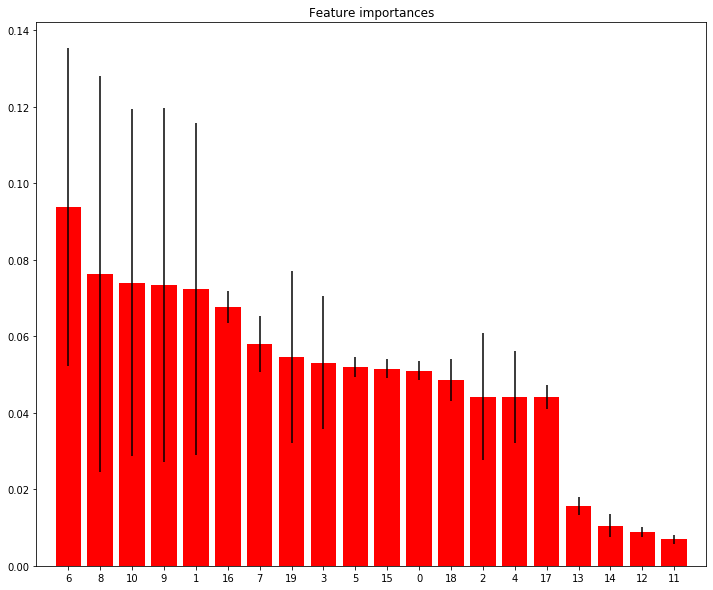

In [25]:
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,RandomForestClassifier
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random Forest

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report



kf = KFold(n_splits=10)
kf.get_n_splits(X)
yhat=[]
lista_y = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clasificador = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              random_state=None, verbose=0,
                                              warm_start=False)
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    lista_y.extend(y_test)
print(classification_report(lista_y,yhat,digits=3))

              precision    recall  f1-score   support

           0      0.861     0.895     0.878     34846
           1      0.734     0.668     0.699     15154

    accuracy                          0.826     50000
   macro avg      0.797     0.781     0.788     50000
weighted avg      0.823     0.826     0.824     50000



## XGboost

In [28]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)
yhat=[]
lista_y = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clasificador = XGBClassifier()
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    lista_y.extend(y_test)
print(classification_report(lista_y,yhat,digits=3))

              precision    recall  f1-score   support

           0      0.863     0.888     0.875     34846
           1      0.724     0.675     0.699     15154

    accuracy                          0.824     50000
   macro avg      0.794     0.782     0.787     50000
weighted avg      0.821     0.824     0.822     50000



## ADAboost

In [29]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)
yhat=[]
lista_y = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clasificador = AdaBoostClassifier()
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    lista_y.extend(y_test)
print(classification_report(lista_y,yhat,digits=3))

              precision    recall  f1-score   support

           0      0.854     0.889     0.871     34846
           1      0.717     0.650     0.682     15154

    accuracy                          0.816     50000
   macro avg      0.786     0.769     0.776     50000
weighted avg      0.812     0.816     0.814     50000



## Naive Bayes

In [30]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)
yhat=[]
lista_y = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clasificador = GaussianNB()
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    lista_y.extend(y_test)
print(classification_report(lista_y,yhat,digits=3))

              precision    recall  f1-score   support

           0      0.731     0.971     0.834     34846
           1      0.730     0.178     0.286     15154

    accuracy                          0.731     50000
   macro avg      0.730     0.575     0.560     50000
weighted avg      0.731     0.731     0.668     50000



## Arbol de decision

In [31]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)
yhat=[]
lista_y = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clasificador = DecisionTreeClassifier()
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    lista_y.extend(y_test)
print(classification_report(lista_y,yhat,digits=3))

              precision    recall  f1-score   support

           0      0.820     0.796     0.807     34846
           1      0.560     0.597     0.578     15154

    accuracy                          0.736     50000
   macro avg      0.690     0.697     0.693     50000
weighted avg      0.741     0.736     0.738     50000



## Ajustamos el desbalance de clase con Oversampling

## Metodo SMOTE

In [32]:
from collections import Counter
Counter(y)

Counter({1: 15154, 0: 34846})

In [33]:
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [34]:
Counter(y_resampled)

Counter({1: 34846, 0: 34846})

## Random Forest

In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report



kf = KFold(n_splits=10)
kf.get_n_splits(X_resampled)
yhat=[]
lista_y = []
for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    clasificador = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              random_state=None, verbose=0,
                                              warm_start=False)
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    lista_y.extend(y_test)
print(classification_report(lista_y,yhat,digits=3))

              precision    recall  f1-score   support

           0      0.909     0.673     0.773     34846
           1      0.740     0.933     0.825     34846

    accuracy                          0.803     69692
   macro avg      0.825     0.803     0.799     69692
weighted avg      0.825     0.803     0.799     69692



## Xgboost

In [36]:
from xgboost import XGBClassifier
kf = KFold(n_splits=10)
kf.get_n_splits(X_resampled)
yhat=[]
lista_y = []
for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    clasificador = XGBClassifier()
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    lista_y.extend(y_test)
print(classification_report(lista_y,yhat,digits=3))

              precision    recall  f1-score   support

           0      0.887     0.626     0.734     34846
           1      0.711     0.921     0.802     34846

    accuracy                          0.773     69692
   macro avg      0.799     0.773     0.768     69692
weighted avg      0.799     0.773     0.768     69692



## ADaboost

In [37]:
kf = KFold(n_splits=10)
kf.get_n_splits(X_resampled)
yhat=[]
lista_y = []
for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    clasificador = AdaBoostClassifier()
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    lista_y.extend(y_test)
print(classification_report(lista_y,yhat,digits=3))

              precision    recall  f1-score   support

           0      0.855     0.626     0.723     34846
           1      0.705     0.894     0.789     34846

    accuracy                          0.760     69692
   macro avg      0.780     0.760     0.756     69692
weighted avg      0.780     0.760     0.756     69692



## Vooting algorithnm

In [38]:
clf0=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              random_state=None, verbose=0,
                                              warm_start=False)
clf1= XGBClassifier()
clf2= AdaBoostClassifier()

In [39]:
from sklearn.ensemble import VotingClassifier
clf=VotingClassifier(estimators=[('rf',clf0),('XGB',clf1),('ADaB',clf2)],voting='hard', weights=[1,1,1], n_jobs=-1)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score



print(cross_val_score(clf, X_resampled, y_resampled, cv=10, scoring = make_scorer(f1_score)))

[0.57047342 0.54484137 0.60040459 0.69474666 0.75336206 0.78087837
 0.82018143 0.86910178 0.73551804 0.64328853]
